In [30]:
import numpy as np #numpy arrays
import pandas as pd
import matplotlib.pyplot as plt #graphs and ccharts
import seaborn as ss #data visualization
from sklearn.model_selection import train_test_split #spliting the data into test train(80:20)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Data preprocessing

In [5]:
rwine_data=pd.read_csv('C:/Users/USER/Pictures/data/winequality_red.csv')
rwine_data.shape #no.of rows and col
print(rwine_data['wine_type'])

0       12
1       12
2       12
3       12
4       12
        ..
1594    12
1595    12
1596    12
1597    12
1598    12
Name: wine_type, Length: 1599, dtype: int64


In [80]:
wwine_data=pd.read_csv('C:/Users/USER/Pictures/data/winequality_white.csv')
wwine_data=wwine_data[0:1599] #no.of rows and col
print(wwine_data.shape)

(1599, 13)


In [83]:
frames = [rwine_data,wwine_data]
result = pd.concat(frames)

In [84]:
result.shape

(3198, 13)

In [85]:
print(result)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            7.0              0.29         0.49             3.8      0.047   
1595            6.4              0.27         0.49             7.3      0.046   
1596            6.6              0.55         0.01             2.7      0.034   
1597            6.4              0.27         0.49             7.3      0.046   
1598            6.3              0.24         0.74             1.4      0.172   

      free sulfur dioxide  

In [64]:
result.isnull().sum() #checking missing values   

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
quality                 0
dtype: int64

In [95]:
datatype = result.dtypes
print(datatype)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_type                 int64
quality                   int64
dtype: object


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'wine_type'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

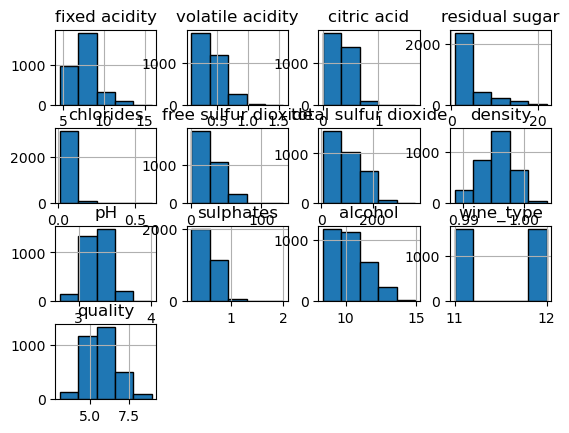

In [101]:
result.hist(edgecolor='black',bins=50)   #Pandas.DataFrame.hist() function is useful in understanding the distribution of numeric variables

# DATA ANALYSIS & Visualize

In [86]:
wwine_data.describe()   #statistical methods

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.0,1599.000000
mean,7.016948,0.280210,0.363615,6.047029,0.046440,34.895560,143.744528,0.994389,3.20666,0.487455,10.285241,11.0,5.874922
std,0.879253,0.103262,0.139089,4.995919,0.023196,16.427488,44.196631,0.002684,0.15662,0.115761,1.123966,0.0,0.935660
min,4.800000,0.080000,0.000000,0.800000,0.017000,3.000000,19.000000,0.988600,2.74000,0.250000,8.500000,11.0,3.000000
25%,6.400000,0.210000,0.280000,1.600000,0.037000,23.000000,113.000000,0.992350,3.09000,0.400000,9.400000,11.0,5.000000
50%,7.000000,0.260000,0.350000,4.700000,0.044000,34.000000,143.000000,0.994000,3.19000,0.470000,10.100000,11.0,6.000000
75%,7.500000,0.320000,0.430000,9.400000,0.050000,46.000000,172.000000,0.996500,3.31000,0.550000,11.000000,11.0,6.000000
max,14.200000,0.905000,1.660000,22.000000,0.346000,131.000000,366.500000,1.001200,3.82000,0.970000,14.000000,11.0,9.000000


In [87]:
rwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,12.0,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.0,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,12.0,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,12.0,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,12.0,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,12.0,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,12.0,8.000000


In [73]:
print(result['quality'].mean())

5.818377712790519


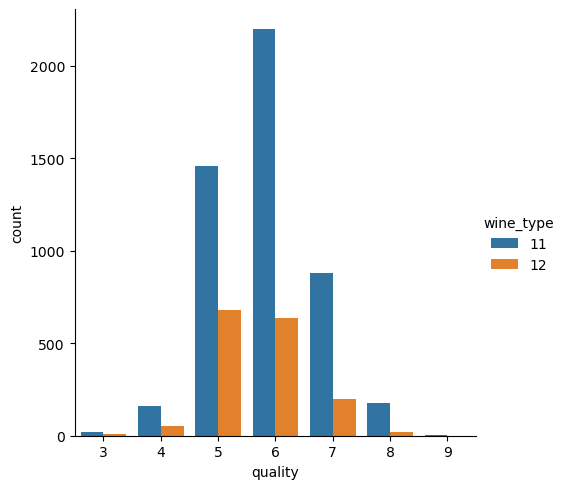

In [14]:
#Quality check
ss.catplot(x='quality',data=result,kind='count',hue='wine_type')  #catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables)

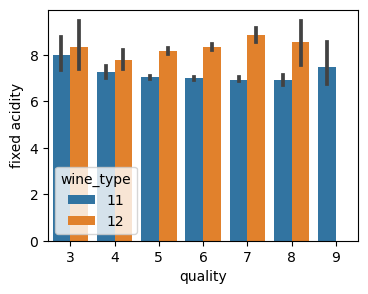

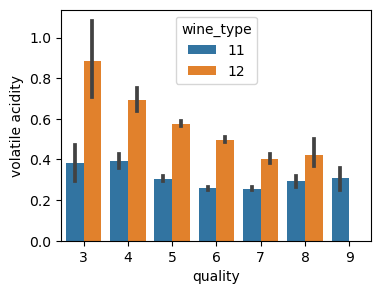

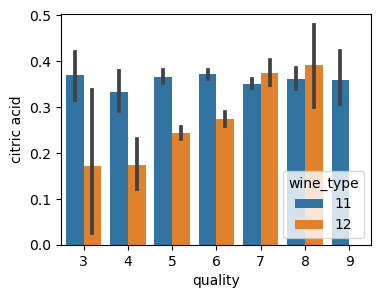

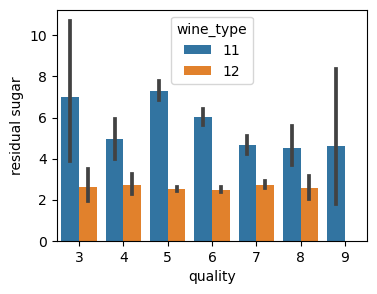

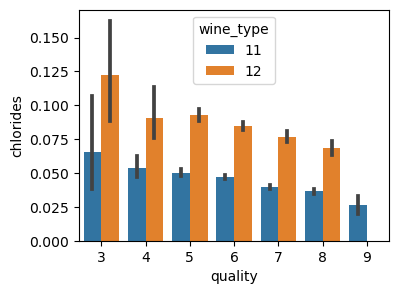

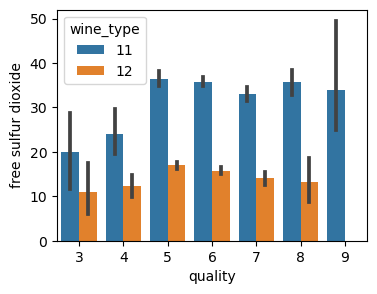

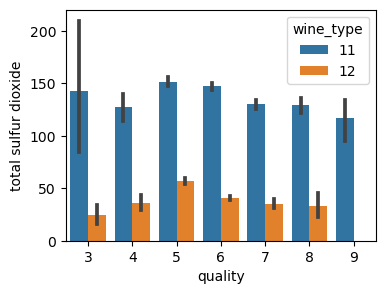

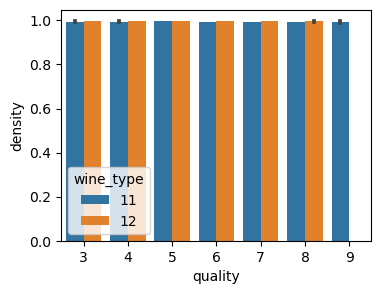

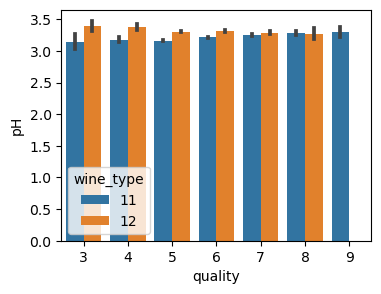

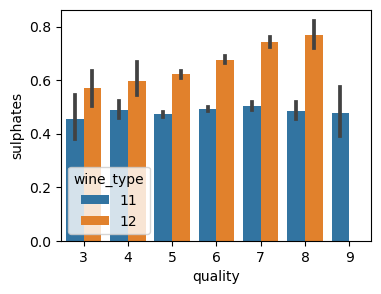

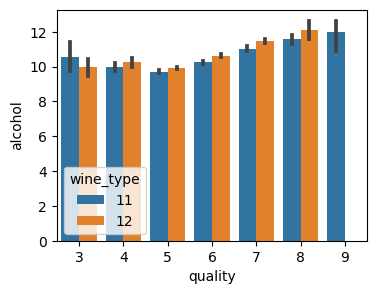

In [94]:
#comparison of columns with quality
arr = np.array(["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
for i in arr:
    plot=plt.figure(figsize=(4,3))
    ss.barplot(x="quality",y=i,data=result,hue='wine_type')


<AxesSubplot:>

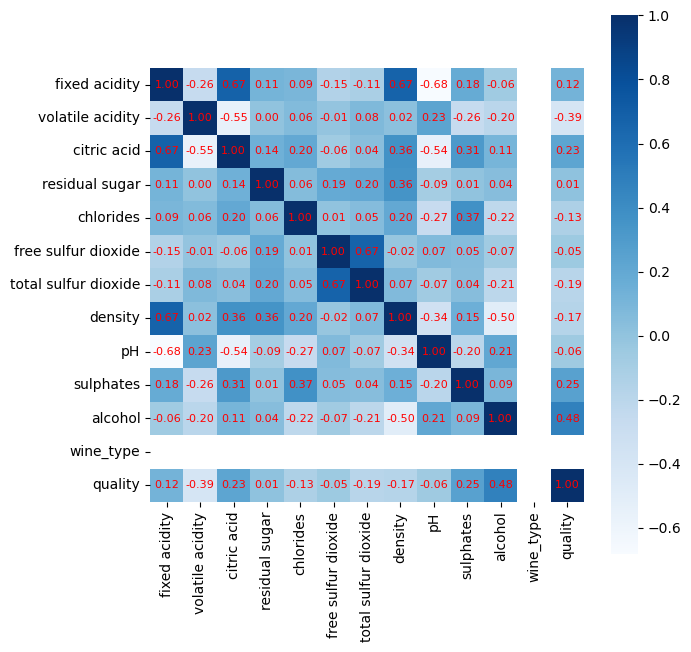

In [17]:
###CORRELATION with quality it is usually presented in heatmap
correlation=rwine_data.corr() 
plot2=plt.figure(figsize=(7,7))
ss.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8,'color':'red'},cmap='Blues')

<AxesSubplot:>

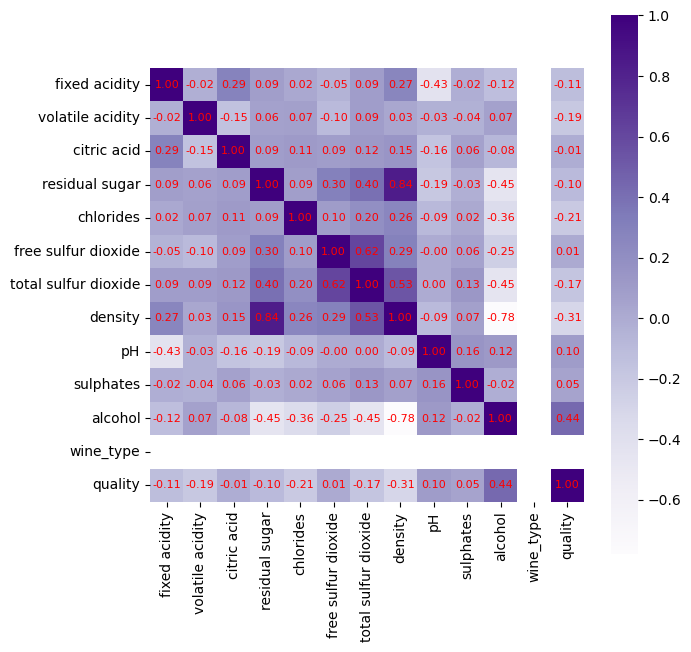

In [18]:
correlation=wwine_data1.corr() 
plot2=plt.figure(figsize=(7,7))
ss.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8,'color':'red'},cmap='Purples')

# Model training to predict wine type and wine Quality

In [21]:
X=result.drop(['wine_type','quality'],axis=1) #if droping row axis=0,droping vol axis=1
Y=result['wine_type'] #.apply(lambda y_value:0 if y_value<=5 else 0) ----->Lambda funct.

In [22]:
Z=result['quality']

In [23]:
#SPLITTING DATA INTO TEST & TRAINING
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [35]:
modelR=RandomForestClassifier()

In [36]:
modelR.fit(X_train,Z_train)  #quality of wine

RandomForestClassifier()

In [24]:
#SPLITTING DATA INTO TEST & TRAINING
Z_train,Z_test=train_test_split(Z,test_size=0.1,random_state=0)

In [54]:
modelL=LogisticRegression(solver='liblinear', C=10.0, random_state=1)

In [55]:
modelL.fit(X_train,Y_train) #predicting wine type(white or red wine)

LogisticRegression(C=10.0, random_state=1, solver='liblinear')

In [40]:
#Confusion matrix for logistic Regression
print(classification_report(Y, modelL.predict(X)))

              precision    recall  f1-score   support

          11       0.98      0.99      0.99      4898
          12       0.97      0.95      0.96      1599

    accuracy                           0.98      6497
   macro avg       0.98      0.97      0.97      6497
weighted avg       0.98      0.98      0.98      6497



In [61]:
#model evaluation to predicct wine type
X_train_predict=modelL.predict(X_train)
train_accur=accuracy_score(X_train_predict,Y_train)
print(train_accur)

0.987172909184197


In [60]:
#prediction of wine quality
X_train_prediction=modelR.predict(X_train)
train_acc=accuracy_score(X_train_prediction,Z_train)
print(train_acc)

1.0


In [58]:
#accuracy on  wine_type  test data
prediction=modelL.predict(X_test)
accuracy=accuracy_score(prediction,Y_test)

In [59]:
#accuracy on  quality  test data
prediction1=modelR.predict(X_test)
accuracy_quality=accuracy_score(prediction1,Z_test)

In [256]:
print('accuracy for quality model',accuracy_quality,'\n accuracy for wine type prediction',accuracy)

accuracy for quality model 0.6861538461538461 
 accuracy for wine type prediction 0.9984615384615385


In [257]:
input_data=(7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8)
input_data_array=np.asarray(input_data)
in_data=input_data_array.reshape(1,-1)
prediction=model1.predict(in_data)

prediction1=model.predict(in_data)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [258]:
if(prediction==12):
    print("Red Wine")
    print("Quality is",prediction1)
else:
    print("White wine")
    print("Quality is",prediction1)

White wine
Quality is [6]
